# Convolutions and Correlations

In this notebook, we interact with __correlations__, which are a version of a __convolution__ defined by:
\begin{equation}
\left[f\star g\right](\tau) = \int_{-\infty}^\infty{f(g)~g^*(t-\tau)~dt},
\end{equation}
where $^*$ denotes the complex conjugate. For convolution, we omit the conjugate, using $g(\tau - t)$ in place of $g^*(t-\tau)$.

## Simulation 1: Interacting with the Convolution


In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

interactive(children=(FloatSlider(value=0.0, description='Offset', layout=Layout(grid_area='footer', width='au…

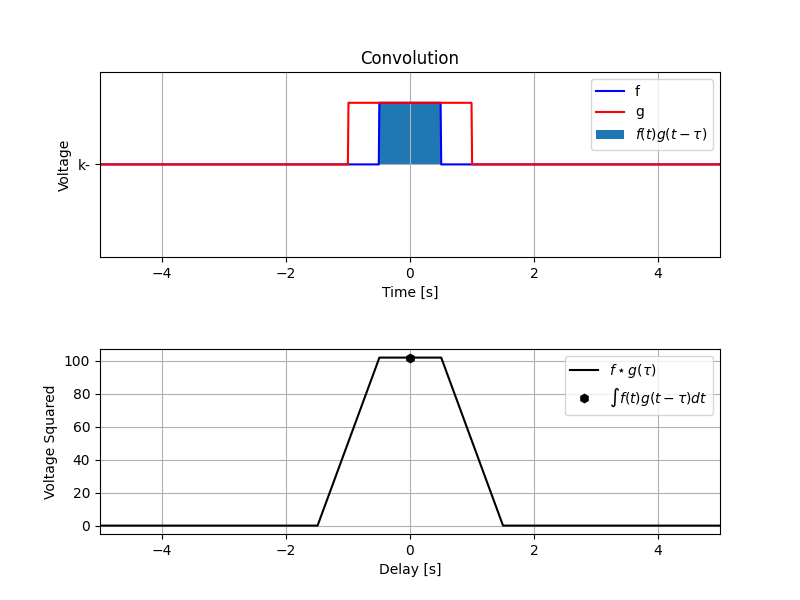

In [3]:
# SIMULATION PARAMETERS
TMIN = -5
TMAX = 5

def f(t):
    '''The first function to convolve.'''
    freq = 0.4
    #return np.sin(2*np.pi * freq * t)
    return np.where(np.abs(t) < 0.5, 1, 0)

def g(t):
    '''The second function to convolve.'''
    freq = 0.4
    #return np.sin(2*np.pi * freq * (t + 2))
    return np.where(np.abs(t) < 1, 1, 0)

offset_initial = 0.
ts = np.linspace(TMIN, TMAX, 1024)

fig, (ax1,ax2) = plt.subplots(2, figsize=(8,6))
fig.subplots_adjust(hspace=0.5)
f_line, = ax1.plot(ts, f(ts), 'b-', label='f')
g_line, = ax1.plot(ts, g(ts - offset_initial), 'r-', label='g')
fg_coll = ax1.fill_between(ts, f(ts) * g(ts - offset_initial), 'k-', label='$f(t) g(t-\\tau)$')
fCg_line, = ax2.plot(ts, np.convolve(f(ts), g(ts), mode='same'), 'k-', label='$f\\star g(\\tau)$')
fg_pnt, = ax2.plot([offset_initial], np.sum(f(ts) * g(ts - offset_initial)), 'kh',
                   label='$\\int{f(t) g(t-\\tau) dt}$')

# Slider controlling offset
off_widget = FloatSlider(offset_initial, min=ts.min(), max=ts.max(), step=0.01, 
                         description='Offset',
                         style={'description_width':'initial'},
                         layout=Layout(width='auto', grid_area='footer'))

def update(offset):
    '''Update plots for each line according to the time step. Reads dt 
    from dt_widget.'''
    g_line.set_ydata(g(ts-offset))
    fg_pnt.set_xdata([offset])
    fg_pnt.set_ydata(np.sum(f(ts) * g(ts-offset)))
    path = fg_coll.get_paths()[0]
    path.vertices[:ts.size,1] = f(ts) * g(ts-offset)
    
def init(ax1, ax2):
    '''Set initial plot parameters.'''
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Voltage')
    ax2.set_xlabel('Delay [s]')
    ax2.set_ylabel('Voltage Squared')
    ax1.set_xlim(TMIN, TMAX)
    ax2.set_xlim(TMIN, TMAX)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_title('Convolution')
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    ax1.grid(True)
    ax2.grid(True)
    
init(ax1, ax2)
interact(update, offset=off_widget)
plt.show()

# Simulation 2: Convolution Theorem

In class, we learned about the __Convolution Theorem__ relating the convolution (an operation on two functions) to the __Fourier Transform__.

The Fourier transform definition we use is
\begin{equation}
\tilde f(\omega) = \int_{-\infty}^\infty{f(t)~e^{-i\omega t}~dt}
\end{equation}
with corresponding inverse\
\begin{equation}
f(t) = \frac{1}{2\pi}\int_{-\infty}^\infty{\tilde f(\omega)~e^{i\omega t}~d\omega}.
\end{equation}

The convolution theorem states that the convolution operation in time domain is equivalent to taking the product of the functions in frequency domain. For correlation, this looks like:
\begin{equation}
\widetilde{\left[f\star g\right](\tau)} = \tilde f(\omega)\cdot \tilde g^*(\omega)
\end{equation}

You can try to test this numerically using the {\tt numpy.fft.fft} and {\tt numpy.convolve} functions. 